#### Fuel Economy Data
This information is provided by the U.S. Environmental Protection Agency, Office of Mobile Sources, National Vehicle and Fuel Emissions Laboratory.
The analysis uses data from 2008 and 2018.

Link: https://www.fueleconomy.gov/feg/download.shtml

### Data visualisation 

Using clean data stored in [clean_08.csv] and [clean_18.csv]

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')  #https://seaborn.pydata.org/tutorial/aesthetics.html

%matplotlib inline

In [2]:
df_ca_08 = pd.read_csv('clean_08.csv')
df_ca_08.head(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no


In [3]:
df_ca_18 = pd.read_csv('clean_18.csv')
df_ca_18.head(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No


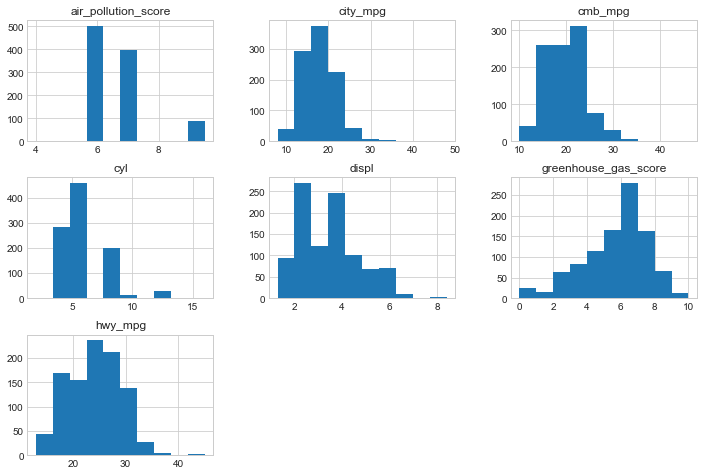

In [7]:
df_ca_08.hist(figsize=(12,8));

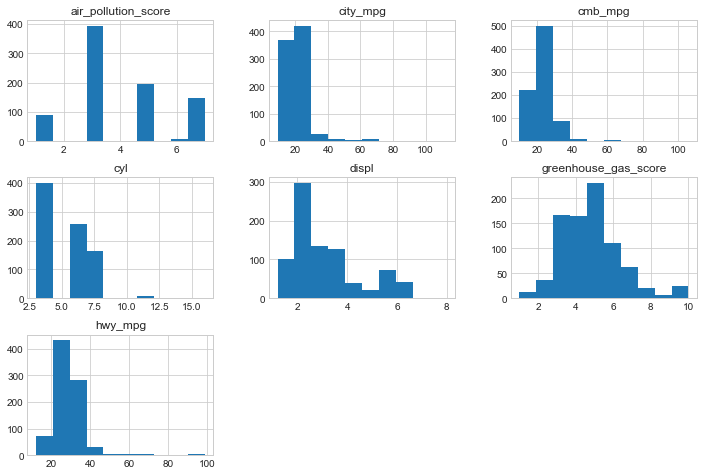

In [8]:
df_ca_18.hist(figsize=(12,8));

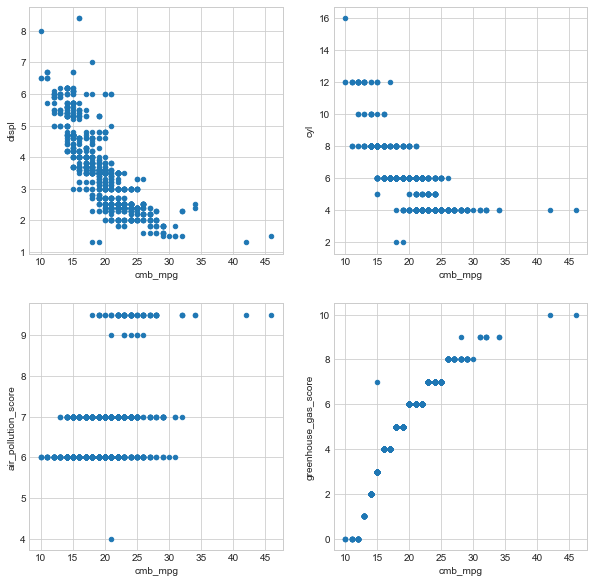

In [20]:
rows = 2
cols = 2

fig = plt.figure(figsize = (10,10), tight_layout=False)
count = 1

for col in ['displ','cyl', 'air_pollution_score', 'greenhouse_gas_score']:  
    ax = fig.add_subplot(rows,cols,count) 
    df_ca_08.plot(x = 'cmb_mpg', y = col, kind = 'scatter', ax=ax);
    count += 1

In [21]:
year_08 = np.repeat('2008', len(df_ca_08.index))
year_18 = np.repeat('2018', len(df_ca_18.index))

In [22]:
df_ca_08['year'] = year_08
df_ca_18['year'] = year_18

In [24]:
df_fuel = df_ca_08.append(df_ca_18, ignore_index=True, sort=False)
df_fuel.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,year
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no,2008
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no,2008
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no,2008
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes,2008
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes,2008


In [25]:
df_fuel.tail()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,year
1814,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5.0,13.0,17.0,14.0,1,No,2018
1815,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5.0,13.0,17.0,15.0,2,No,2018
1816,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7.0,70.0,72.0,71.0,10,Elite,2018
1817,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7.0,60.0,58.0,59.0,10,Elite,2018
1818,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Electricity,standard SUV,7.0,63.0,61.0,62.0,10,Elite,2018


###### Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

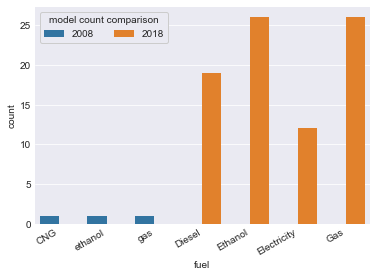

In [39]:
alt_fuel = df_fuel[df_fuel['fuel'] != 'Gasoline']

ax = sns.countplot(data = alt_fuel, x = 'fuel', hue = 'year');
ax.legend(loc = 'upper left', ncol = 3, framealpha = 1, title = 'model count comparison', frameon = True);
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha = 'right');

##### Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?

In [43]:
df_vc = df_fuel.groupby(['veh_class','year'], as_index = False)['cmb_mpg'].mean()
df_vc

,veh_class,year,cmb_mpg
0,SUV,2008,18.471429
1,large car,2008,18.509091
2,large car,2018,23.409091
3,midsize car,2008,21.601449
4,midsize car,2018,27.884058
5,minivan,2008,19.117647
6,minivan,2018,20.800000
7,pickup,2008,16.277108
8,pickup,2018,18.589744
9,small SUV,2018,24.074074


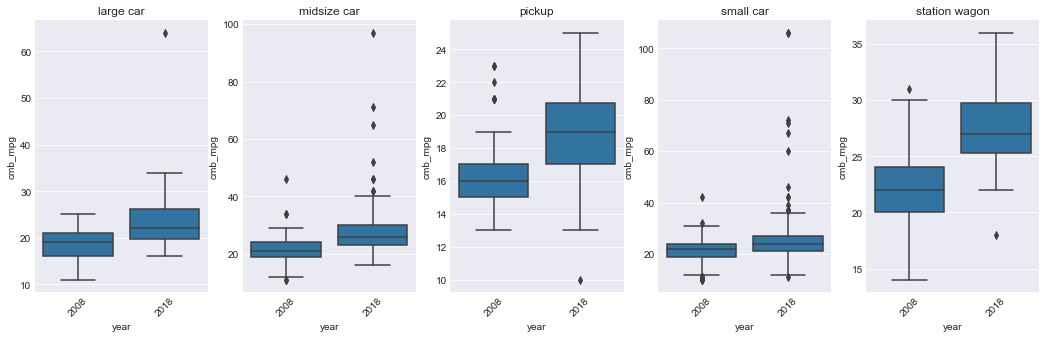

In [59]:
plt.figure(figsize = [18, 5])

vehclass = ['large car', 'midsize car', 'pickup', 'small car', 'station wagon']

count = 1

for veh in vehclass: 
    plt.subplot(1, 5, count)
    base_color = sns.color_palette()[0]
    sns.boxplot(data = df_fuel[df_fuel['veh_class'] == veh], x = 'year', y = 'cmb_mpg',
                   color = base_color);
    plt.xticks(rotation = 45)
    plt.title(veh)
    count += 1;

##### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

##### Q4: What features are associated with better fuel economy (mpg)?